<a href="https://colab.research.google.com/github/letsgogeeky/covid_death/blob/main/death_difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import csv

def get_csv_as_dict(file_name):
  records = []
  with open(file_name, 'r') as f:
    contents = csv.DictReader(f)
    records = list(contents)
  
  return records

data = get_csv_as_dict('excess-mortality.csv')

In [13]:
grouped_by_country = {}
for line in data:
  if not line['deaths_2020_all_ages'] or not line['deaths_2019_all_ages']:
    continue
  difference = int(line['deaths_2020_all_ages']) - int(line['deaths_2019_all_ages'])
  percentage = (difference / int(line['deaths_2019_all_ages'])) * 100 
  if line['Entity'] in grouped_by_country:
    grouped_by_country[line['Entity']][line['Day']] = {
        'difference': difference,
        'prev': int(line['deaths_2019_all_ages']),
        'percentage': percentage
    }
  else:
    grouped_by_country[line['Entity']] = {}
    grouped_by_country[line['Entity']][line['Day']] = {
        'difference': difference,
        'prev': int(line['deaths_2019_all_ages']),
        'percentage': percentage
    }

In [14]:
over_the_year = []

for key, value in grouped_by_country.items():
  total_difference = 0 
  total_prev = 0
  for _, day in value.items():
    total_difference = total_difference + day['difference']
    total_prev = total_prev + day['prev']
  diff_percentage = (total_difference / total_prev) * 100 
  country_over_year = {
      'country': key,
      'difference': total_difference,
      'previous': total_prev,
      'percentage': diff_percentage
  }
  over_the_year.append(country_over_year)

print(len(over_the_year))
print(over_the_year)

84
[{'country': 'Albania', 'difference': 5668, 'previous': 21937, 'percentage': 25.837625928796097}, {'country': 'Andorra', 'difference': 118, 'previous': 301, 'percentage': 39.202657807308974}, {'country': 'Armenia', 'difference': 9119, 'previous': 26252, 'percentage': 34.73640103611154}, {'country': 'Australia', 'difference': -3314, 'previous': 143674, 'percentage': -2.3066107994487517}, {'country': 'Austria', 'difference': 8064, 'previous': 81485, 'percentage': 9.896299932502915}, {'country': 'Azerbaijan', 'difference': 19200, 'previous': 56447, 'percentage': 34.01420801814091}, {'country': 'Belarus', 'difference': 4417, 'previous': 62488, 'percentage': 7.068557162975292}, {'country': 'Belgium', 'difference': 18133, 'previous': 108436, 'percentage': 16.722306245158432}, {'country': 'Bolivia', 'difference': 23308, 'previous': 51998, 'percentage': 44.82480095388284}, {'country': 'Brazil', 'difference': 222437, 'previous': 1349802, 'percentage': 16.479231768807573}, {'country': 'Bulgar

In [16]:
import pandas as pd

country_data = pd.DataFrame(over_the_year, columns = ['country', 'difference', 'previous', 'percentage'])
country_data.describe()

country_data['difference'].sum()

2393660

In [19]:
country_data.sort_values(['difference'], ascending=False)

,country,difference,previous,percentage
82,United States,490569,2852462,17.198091
65,Russia,323796,1800683,17.981844
47,Mexico,301866,728889,41.414536
9,Brazil,222437,1349802,16.479232
36,Italy,97560,642964,15.173478
...,...,...,...,...
76,Taiwan,-3289,175116,-1.878184
3,Australia,-3314,143674,-2.306611
77,Thailand,-4773,506211,-0.942887
38,Japan,-6264,1387775,-0.451370


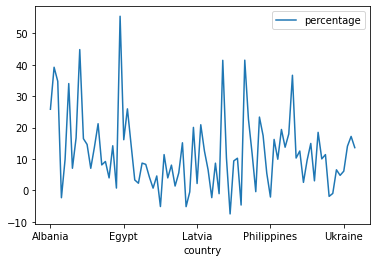

In [26]:

country_data.plot.line(x='country', y='percentage')

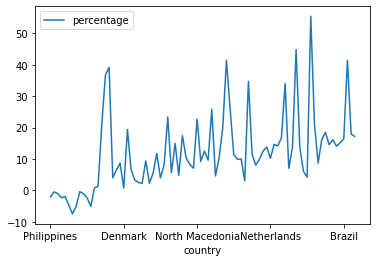

In [27]:
sorted_country_data = country_data.sort_values(['difference'], ascending=True)
sorted_country_data.plot.line(x='country', y = 'percentage')